In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("diamonds.csv")

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.dtypes.index

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
df.duplicated().sum()

146

In [13]:
df.describe(include = "O")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

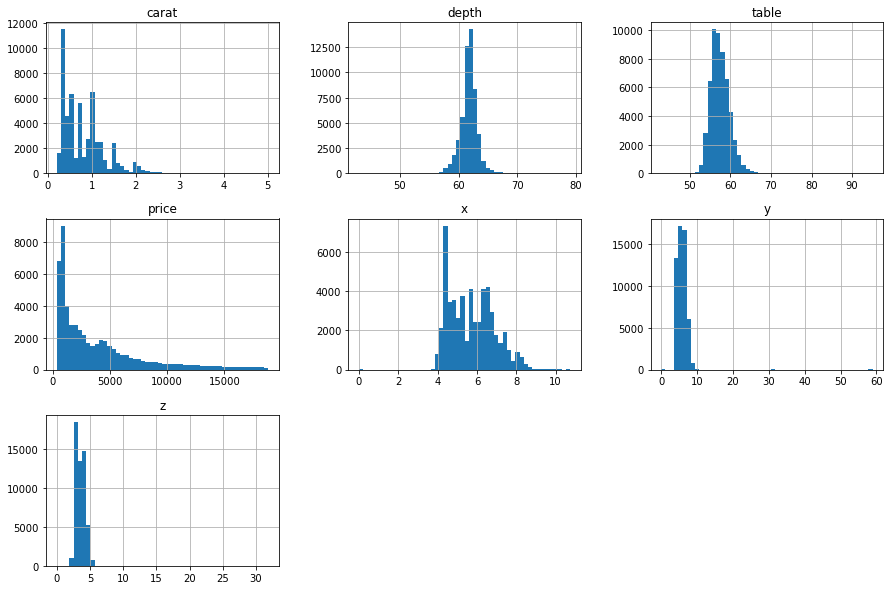

In [14]:
df.hist(bins = 50 , figsize = (15,10))

In [15]:
df_train , df_test = train_test_split(df , test_size = 0.2 , random_state = 120 )
display(df.shape)
display(df_test.shape)

(53940, 10)

(10788, 10)

In [16]:
df_train['Price'] = df_train['price']
df_train.drop(columns =['price'],inplace = True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

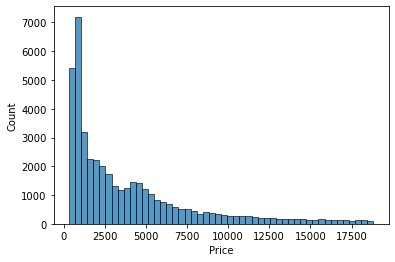

In [17]:
sns.histplot(x = "Price" , data = df_train, bins = 50)

<AxesSubplot:xlabel='Price', ylabel='Count'>

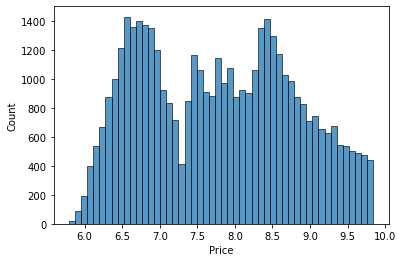

In [18]:
df_train['Price'] =np.log1p(df_train['Price'])
sns.histplot(x = "Price" , data = df_train, bins = 50)

<AxesSubplot:ylabel='carat'>

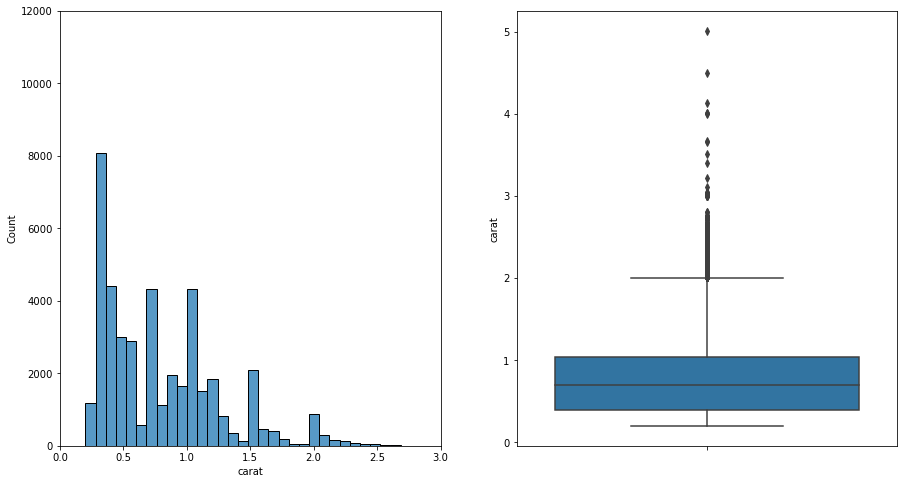

In [19]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.axis([0,3,0,12000])
sns.histplot(x = "carat" , data = df_train, bins = 60)
plt.subplot(122)
sns.boxplot(y = "carat" , data = df_train)

<AxesSubplot:ylabel='x'>

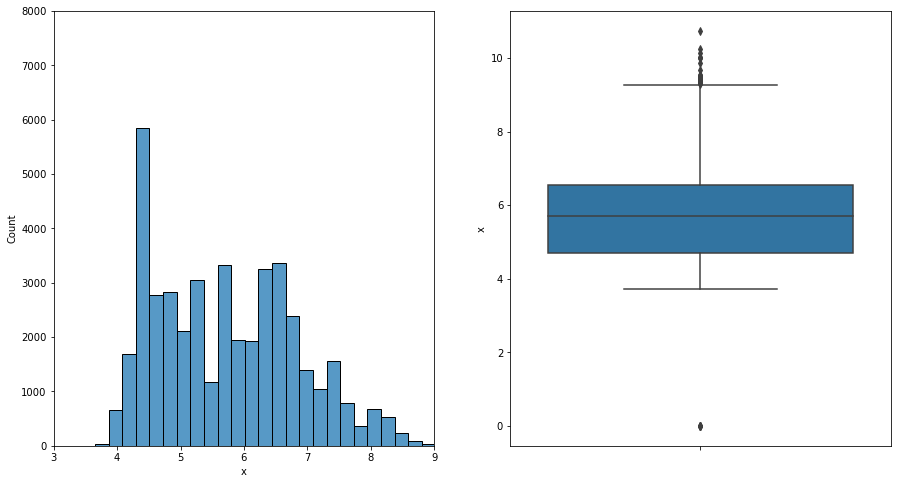

In [20]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.axis([3,9,0,8000])
sns.histplot(x = "x" , data = df_train, bins = 50)
plt.subplot(122)
sns.boxplot(y = "x" , data = df_train)

<AxesSubplot:ylabel='y'>

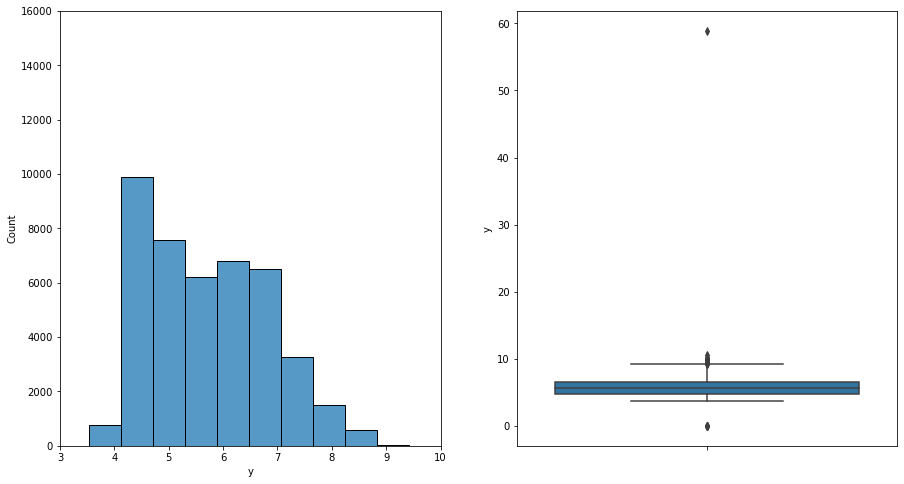

In [21]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.axis([3,10,0,16000])
sns.histplot(x = "y" , data = df_train, bins = 100)
plt.subplot(122)
sns.boxplot(y= "y" , data = df_train)

<AxesSubplot:ylabel='z'>

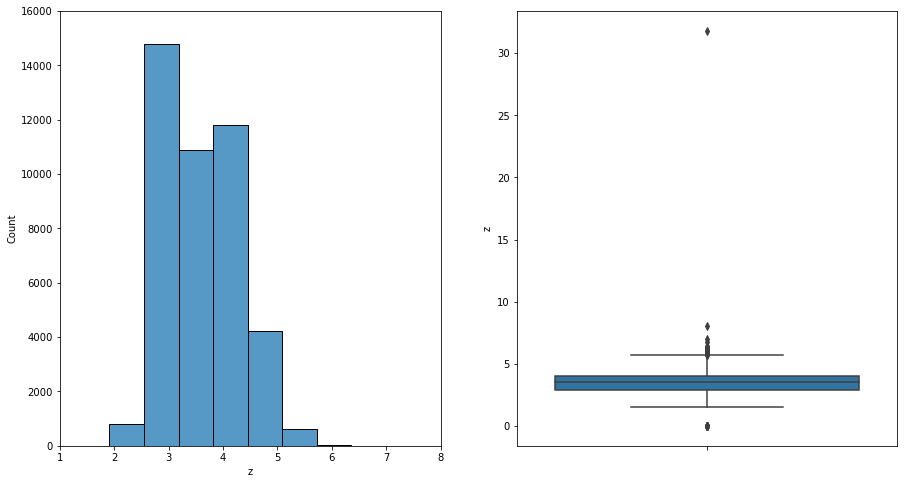

In [22]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.axis([1,8,0,16000])
sns.histplot(x = "z" , data = df_train, bins = 50)
plt.subplot(122)
sns.boxplot(y = "z" , data = df_train)

<AxesSubplot:xlabel='cut', ylabel='count'>

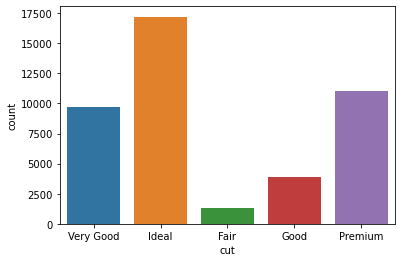

In [23]:
sns.countplot(x = "cut", data = df_train)

<AxesSubplot:xlabel='color', ylabel='count'>

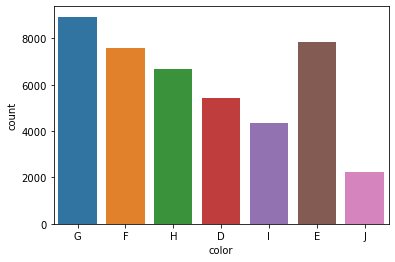

In [24]:
sns.countplot(x = "color", data = df_train)

<AxesSubplot:xlabel='clarity', ylabel='count'>

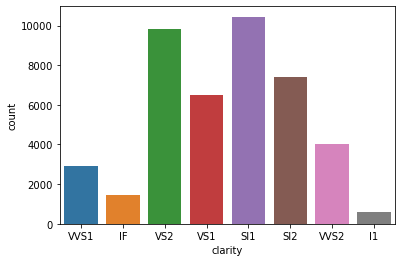

In [25]:
sns.countplot(x = "clarity", data = df_train)

In [26]:
corr_matrix = df_train.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price    1.000000
x        0.957639
y        0.936092
z        0.932075
carat    0.919619
table    0.158482
depth    0.004799
Name: Price, dtype: float64

<AxesSubplot:>

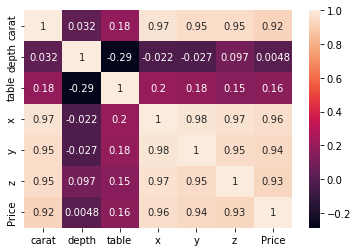

In [27]:
sns.heatmap(corr_matrix , annot = True)

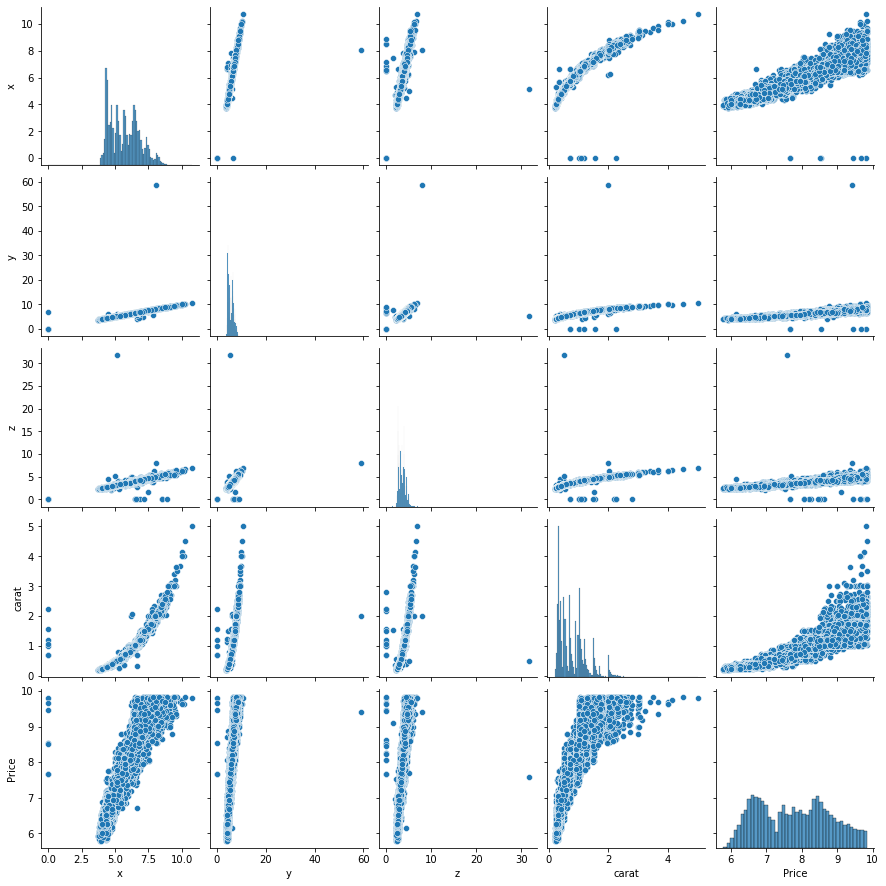

In [28]:
attr =["x","y","z","carat","Price"]  
sns.pairplot(df_train[attr])

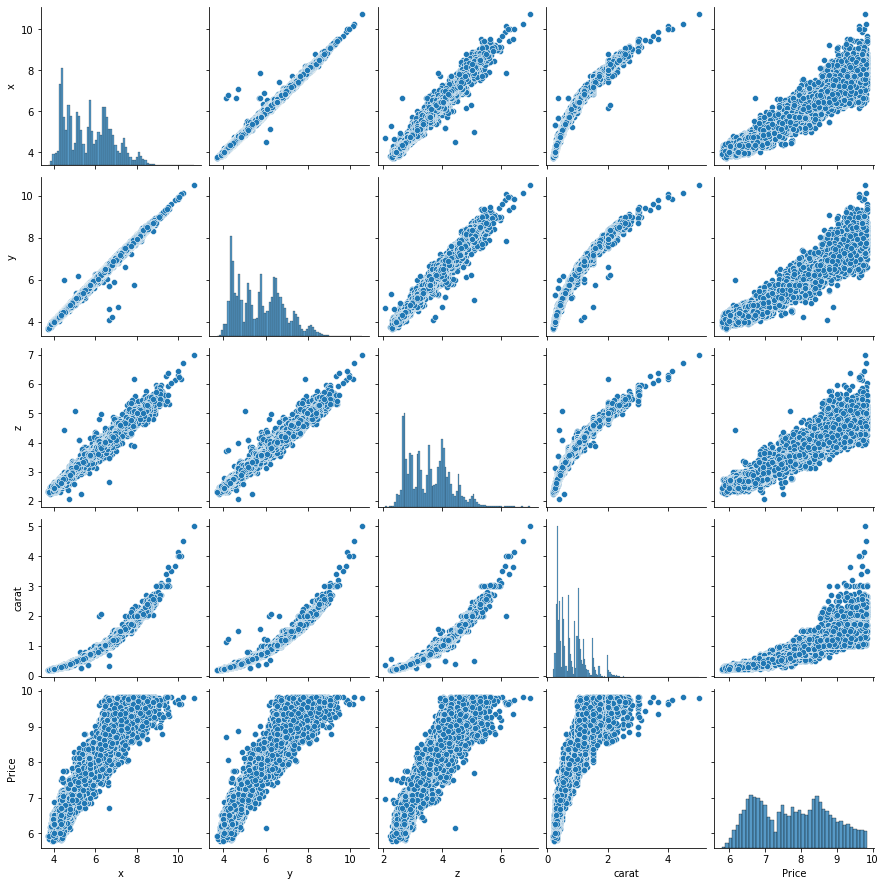

In [29]:
# Remove Outliers
df_train = df_train[df_train["x"]>3]
df_train = df_train[df_train["y"]<20]
df_train = df_train[(df_train["z"]>2) & (df_train["z"]<10)]
sns.pairplot(df_train[attr])

<AxesSubplot:xlabel='cut', ylabel='Price'>

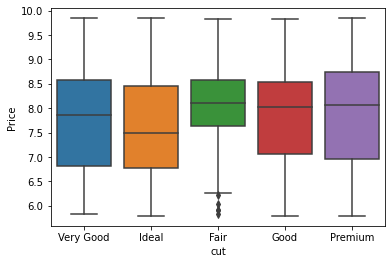

In [30]:
sns.boxplot(x= "cut" , y = "Price" , data = df_train)

<AxesSubplot:xlabel='clarity', ylabel='Price'>

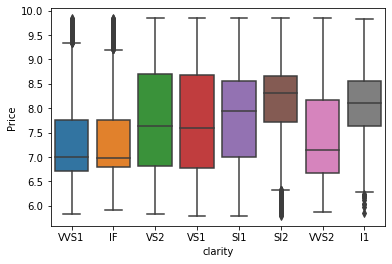

In [31]:
sns.boxplot(x= "clarity" , y = "Price" , data = df_train)

In [32]:
Diamond = df_train.copy() 

In [33]:
Diamond_features = Diamond.drop("Price",axis = 1)
Diamond_label = Diamond[["Price"]]
Diamond_features.head()

,carat,cut,color,clarity,depth,table,x,y,z
33155,0.31,Very Good,G,VVS1,62.8,53.0,4.34,4.36,2.73
36586,0.33,Ideal,G,IF,60.9,57.0,4.45,4.48,2.72
7435,0.90,Fair,F,VS2,64.4,53.0,6.08,6.04,3.90
43116,0.52,Good,H,VS2,63.6,57.0,5.10,5.05,3.23
7394,0.33,Premium,H,VS1,59.5,59.0,4.48,4.53,2.68


In [34]:
Cat_Features = (Diamond_features.dtypes == "object")
Cat_Features = list(Cat_Features[Cat_Features].index)
Cat_Features

['cut', 'color', 'clarity']

In [35]:
Diamond_num = Diamond_features.drop(Cat_Features, axis = 1)
Diamond_cat = Diamond_features[Cat_Features]
print(Diamond_num.columns)
print("-"*70)
print(Diamond_cat.columns)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
----------------------------------------------------------------------
Index(['cut', 'color', 'clarity'], dtype='object')


In [36]:
type(Diamond_features)

pandas.core.frame.DataFrame

In [37]:
#Data cleaning

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [39]:
imput = SimpleImputer(missing_values = 0 ,strategy = "mean")
X = imput.fit_transform(Diamond_num)

In [40]:
imput.statistics_

array([ 0.79781583, 61.75341154, 57.45990773,  5.73135047,  5.73311339,
        3.53972434])

In [41]:
Diamond_cat.head()

,cut,color,clarity
33155,Very Good,G,VVS1
36586,Ideal,G,IF
7435,Fair,F,VS2
43116,Good,H,VS2
7394,Premium,H,VS1


In [42]:
Diamond_cat_1hot = Diamond_cat.drop("cut",axis = 1)
Diamond_cat_ordinal = Diamond_cat[["cut"]]

In [43]:
display(Diamond_cat_1hot.columns)
print("-"*60)
display(Diamond_cat_ordinal.columns)

Index(['color', 'clarity'], dtype='object')

------------------------------------------------------------


Index(['cut'], dtype='object')

In [44]:
type(Diamond_cat_1hot)

pandas.core.frame.DataFrame

In [45]:
type(Diamond_cat_ordinal)

pandas.core.frame.DataFrame

In [46]:
one_hot = OneHotEncoder(sparse = False )
Diamond_cat_1hotenc = one_hot.fit_transform(Diamond_cat_1hot)

C:\Users\lhajizade\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
one_hot.categories_

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [48]:
ordinal_ecoder = OrdinalEncoder()
Diamond_cat_ordenc = ordinal_ecoder.fit_transform(Diamond_cat_ordinal)

In [49]:
ordinal_ecoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)]

In [50]:
# pipe line for numerical columns
num_pipe = Pipeline([
    ("imputer" ,SimpleImputer(missing_values = 0 ,strategy = "mean")),
    ("scalar" , StandardScaler())])

In [51]:
num_prepared = num_pipe.fit_transform(Diamond_num)

In [52]:
full_pipe = ColumnTransformer([
              ("num",num_pipe,list(Diamond_num)),
              ("cat_1hot",OneHotEncoder(sparse = False),list(Diamond_cat_1hot)),
              ("cat_ord",OrdinalEncoder(),list(Diamond_cat_ordinal))
            ])

In [53]:
Diamond_Prepard = full_pipe.fit_transform(Diamond_features)
Diamond_Prepard.shape

C:\Users\lhajizade\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(43133, 22)

In [54]:
#Model selection and training

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [56]:
def Model_Evaluation (Actual_y , Pred_y,X,Model):

    print("R^2:",r2_score(Actual_y, Pred_y))
    print("Adjusted R^2:",1 - (1-r2_score(Actual_y, Pred_y))*(len(Actual_y)-1)/(len(Actual_y)-X.shape[1]-1))
    print("MAE:",mean_absolute_error(Actual_y, Pred_y))
    print("MSE:",mean_squared_error(Actual_y, Pred_y))
    print("RMSE:",mean_squared_error(Actual_y, Pred_y,squared = False))

In [57]:
#Linear Regression

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(Diamond_Prepard, Diamond_label)

LinearRegression()

In [59]:
y_pred = lin_reg.predict(Diamond_Prepard)
Model_Evaluation(Diamond_label,y_pred,Diamond_Prepard,lin_reg)

R^2: 0.9818369468192499
Adjusted R^2: 0.9818276778057965
MAE: 0.10592878322161493
MSE: 0.018632878931394755
RMSE: 0.1365023037585621


In [60]:
#Decsision Tree Regression

In [61]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(Diamond_Prepard, Diamond_label)

DecisionTreeRegressor(random_state=42)

In [62]:
y_pred = tree_reg.predict(Diamond_Prepard)
Model_Evaluation(Diamond_label,y_pred,Diamond_Prepard,tree_reg)

R^2: 0.9999829256844938
Adjusted R^2: 0.9999829169710875
MAE: 0.00017970971871811146
MSE: 1.7515978756308064e-05
RMSE: 0.004185209523585177


In [63]:
#LGBM Regressor

In [64]:
lgbm_model = LGBMRegressor(max_depth=8, n_estimators=555, boosting_type='gbdt', random_state=42)
lgbm_model.fit(Diamond_Prepard, Diamond_label) 

C:\Users\lhajizade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(max_depth=8, n_estimators=555, random_state=42)

In [65]:
y_pred = lgbm_model.predict(Diamond_Prepard)
Model_Evaluation(Diamond_label,y_pred,Diamond_Prepard,lgbm_model)

R^2: 0.9945875106980837
Adjusted R^2: 0.9945847485833854
MAE: 0.05409006056483948
MSE: 0.005552494774775016
RMSE: 0.0745150640795203


In [66]:
#Random Forest Regressor

In [67]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(Diamond_Prepard, Diamond_label)

C:\Users\lhajizade\AppData\Local\Temp\ipykernel_17988\1039118049.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(Diamond_Prepard, Diamond_label)


RandomForestRegressor(random_state=42)

In [68]:
y_pred = forest_reg.predict(Diamond_Prepard)
Model_Evaluation(Diamond_label,y_pred,Diamond_Prepard,forest_reg)

R^2: 0.9988518700291467
Adjusted R^2: 0.9988512841126689
MAE: 0.023797189537920014
MSE: 0.0011778287786488092
RMSE: 0.034319510174954555


In [69]:
#Evaluation & Cross Validation

In [70]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [71]:
lin_scores = cross_val_score(lin_reg, Diamond_Prepard, Diamond_label,
                             cv=10)
lin_rmse_scores = lin_scores
display_scores(lin_rmse_scores)

Scores: [0.98141913 0.98188529 0.98170133 0.9821258  0.98150555 0.98125305
 0.98200658 0.98187023 0.98064531 0.9830847 ]
Mean: 0.9817496983238554
Standard deviation: 0.0006049895278404363


In [72]:
tree_scores = cross_val_score(tree_reg, Diamond_Prepard, Diamond_label,
                         cv=10)

tree_rmse_scores = tree_scores
display_scores(tree_rmse_scores)

Scores: [0.9848945  0.98447396 0.98500146 0.98537761 0.98393298 0.98419129
 0.98401509 0.98334459 0.98345285 0.98503898]
Mean: 0.9843723313999491
Standard deviation: 0.0006624909076084698


In [73]:
lgbm_scores = cross_val_score(lgbm_model, Diamond_Prepard, Diamond_label,
                         cv=10)

lgbm_rmse_scores = lgbm_scores
display_scores(lgbm_rmse_scores)

C:\Users\lhajizade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lhajizade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lhajizade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lhajizade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Scores: [0.99260573 0.99259761 0.99237023 0.99305929 0.99300528 0.99256362
 0.99300599 0.99285183 0.99255675 0.99295651]
Mean: 0.9927572856719001
Standard deviation: 0.00023220280404359948


In [74]:
#Linear Regrission is the best

In [75]:
#Evaluation

In [76]:
Test_Set = df_test.copy()
Test_Set.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
8552,1.01,Ideal,E,SI2,62.8,57.0,4434,6.38,6.35,4.00
33869,0.30,Ideal,E,VS2,62.0,56.0,844,4.34,4.31,2.68
31687,0.26,Ideal,D,VVS2,61.4,56.0,769,4.15,4.12,2.54
47764,0.58,Ideal,E,VS1,62.6,56.0,1893,5.33,5.27,3.32
10770,1.13,Premium,I,SI1,61.5,60.0,4854,6.72,6.68,4.12


In [77]:
Test_Set["Price"] = np.log1p(Test_Set["price"])
Test_Set.drop("price", axis = 1)

,carat,cut,color,clarity,depth,table,x,y,z,Price
8552,1.01,Ideal,E,SI2,62.8,57.0,6.38,6.35,4.00,8.397283
33869,0.30,Ideal,E,VS2,62.0,56.0,4.34,4.31,2.68,6.739337
31687,0.26,Ideal,D,VVS2,61.4,56.0,4.15,4.12,2.54,6.646391
47764,0.58,Ideal,E,VS1,62.6,56.0,5.33,5.27,3.32,7.546446
10770,1.13,Premium,I,SI1,61.5,60.0,6.72,6.68,4.12,8.487764
...,...,...,...,...,...,...,...,...,...,...
21454,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9.164611
26504,2.38,Very Good,J,VS2,62.6,59.0,8.49,8.52,5.32,9.688250
38041,0.35,Fair,D,VVS2,53.2,62.0,4.87,4.80,2.57,6.919684
44059,0.59,Premium,E,SI1,58.7,57.0,5.53,5.47,3.23,7.346655


<AxesSubplot:xlabel='Price', ylabel='Count'>

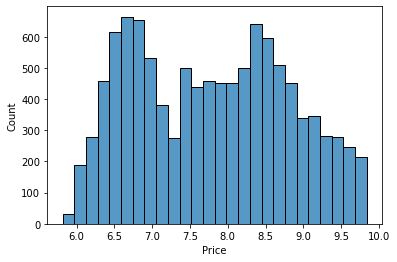

In [78]:
sns.histplot(x = "Price" , data = Test_Set)

In [79]:
X_test = Test_Set.drop("Price",axis = 1)
y_test = Test_Set[["Price"]]

In [80]:
X_test.describe()

,carat,depth,table,price,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.797380,61.733695,57.445921,3952.887653,5.732433,5.736946,3.537169
std,0.470654,1.418067,2.217025,3995.186848,1.120545,1.140546,0.693561
min,0.200000,53.200000,43.000000,334.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2433.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5395.000000,6.540000,6.540000,4.040000
max,3.500000,78.200000,73.000000,18804.000000,9.650000,31.800000,6.030000


In [81]:
X_test_prepard = full_pipe.transform(X_test)

In [82]:
X_test_prepard.shape

(10788, 22)

In [83]:
y_test_pred = lin_reg.predict(X_test_prepard)

In [84]:
Model_Evaluation(y_test,y_test_pred,X_test_prepard,lin_reg)

R^2: 0.9754291763581964
Adjusted R^2: 0.9753789619485244
MAE: 0.10762388374945252
MSE: 0.025498174686164422
RMSE: 0.15968147884511974
